# AirBnB Reviews Topic Modelling: No NER

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import glob as glob

## Load Data

In [7]:
def load_review_data(directory):
    """Load Review Data"""
    reviews_df = pd.read_csv(directory + 'interim/review_wrangled.csv', sep=';', lineterminator='\n').drop(columns=['Unnamed: 0'])
    
    return reviews_df

In [8]:
# Select City
country = 'united-states'
city = 'san-francisco'

# Directory
directory = '../data/' + country + '/' + city + '/'

# Load Data
reviews_df = load_review_data(directory)

In [9]:
reviews_df.head(2)

,listing_id,id,date,comments,tokens,tokens_count,name_entities,name_entities_count,comments_no_ne,no_ne_tokens,no_ne_tokens_count,nouns,nouns_counts,verbs,verbs_counts,adjectives,adjectives_counts
0,958,5977,2009-07-23,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",47,"['David', 'Haight', 'Castro', 'Golden Gate Par...",5,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",39,"['experience', 'doubt', 'star', 'experience', ...",30,"[u'be', u'be', 'accomodating', u'honor', u'be'...",10,"['consummate', 'full', 'perfect', 'full', 'clo...",6
1,958,6660,2009-08-03,Returning to San Francisco is a rejuvenating t...,"['returning', 'san', 'francisco', 'rejuvenatin...",36,"['San Francisco', 'Holly', 'David']",3,Returning to is a rejuvenating thrill but thi...,"['returning', 'rejuvenating', 'thrill', 'time'...",32,"['san', 'francisco', 'rejuvenating', 'thrill',...",19,"[u'return', u'be', u'be', u'enhance', u'renova...",14,"['great', 'local', 'such', 'amenable']",4


# Clean

In [4]:
import ast

reviews_df['tokens'] = reviews_df['tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['name_entities'] = reviews_df['name_entities'].map(lambda x: ast.literal_eval(x))
reviews_df['no_ne_tokens'] = reviews_df['no_ne_tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['nouns'] = reviews_df['nouns'].map(lambda x: ast.literal_eval(x))
reviews_df['verbs'] = reviews_df['verbs'].map(lambda x: ast.literal_eval(x))
reviews_df['adjectives'] = reviews_df['adjectives'].map(lambda x: ast.literal_eval(x))

25.55203560675481

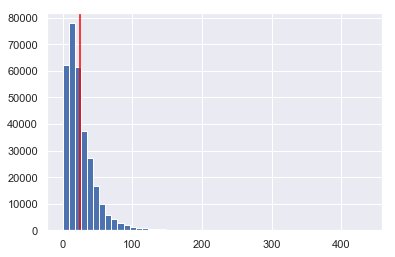

In [6]:
_ = reviews_df['no_ne_tokens_count'].hist(bins=50)
_ = plt.axvline(np.mean(reviews_df['no_ne_tokens_count']), color='red')
np.mean(reviews_df['no_ne_tokens_count'])

# Topic Modelling: 10 Word Topics

In [8]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
import time

num_topics = 50
num_words = 10
passes = 50

# Get Tokens
token_texts = list(reviews_df['no_ne_tokens'].values)

# Create a corpus from a list of texts
common_dictionary = Dictionary(token_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in token_texts]

# Initiate LDA Model
ldam = LdaMulticore

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model = ldam(common_corpus, num_topics=num_topics, id2word=common_dictionary, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results = ldam_model.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

/anaconda3/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [9]:
(model_end_time - start_time)/60/60

3.6053895136382845

In [10]:
ldam_model.save('../models/ldam_reviews_50topics_10words_50passes_no_ner.model')

# Results

In [16]:
def display_results(results):
    for index, results in results:
        print(str(index) + ': ' + str(', '.join(results.split('"')[1::2])))
        
def display_results_no_duplicates(results):
    all_lists = []
    for index, result in results:
        all_lists = all_lists + result.split('"')[1::2]
    
    # Get Counts of each word
    counts = pd.Series(all_lists).value_counts()
    no_duplicates = counts[counts == 1].index
    
    for index, result in results:
        print(str(index) + ': ' + str(', '.join([word for word in result.split('"')[1::2] if word in no_duplicates])))

## Topic Results

In [15]:
display_results(results)

0: back, stay, come, definitely, place, next, would, time, great, love
1: question, quick, always, quickly, respond, available, response, responded, message, help
2: est, nous, pour, bien, le, dans, une, avec, de, pa
3: parking, street, car, find, spot, easy, park, free, garage, space
4: like, cute, really, super, place, cool, picture, dog, look, liked
5: space, light, floor, small, group, window, heater, large, open, plenty
6: apartment, well, decorated, beautifully, nicely, spacious, furnished, appointed, clean, equipped
7: get, even, time, n't, arrived, day, late, meet, got, night
8: great, gave, host, tip, recommendation, local, helpful, city, stay, went
9: located, public, transportation, quiet, close, clean, well, neighborhood, transport, place
10: stayed, family, night, two, week, perfect, day, one, kid, wish
11: weekend, top, beat, getaway, surprised, mary, notch, hassle, start, wedding
12: walking, distance, within, restaurant, many, location, attraction, reasonable, park, nei

In [15]:
display_results_no_duplicates(results)

0: back, come, next, love
1: question, quick, always, quickly, respond, available, response, responded, message, help
2: nous, pour, le, dans, une, avec, de, pa
3: parking, street, car, find, spot, free, garage
4: cute, cool, dog, look, liked
5: light, floor, small, group, window, heater, large, open, plenty
6: apartment, decorated, beautifully, nicely, furnished, appointed
7: arrived, late, meet, got
8: gave, tip, recommendation, local, went
9: located, public, transportation, transport
10: family, two, week, kid, wish
11: weekend, top, beat, getaway, surprised, mary, notch, hassle, start, wedding
12: walking, distance, within, many, attraction, reasonable
13: arrival, unit, property, reservation, upon, posting, automated, canceled
14: new, cat, nothing, brand, construction, functional, smart, review, accurately, keypad
15: private, shared, guest
16: muy, que, con, casa, para, una, todo, del
17: ..., beach, sunset, cottage, yes, peter, pool, skyline, hop, journey
18: best, experience,

# Topic Modelling: 30 Topics 10 Word

In [72]:
from gensim.models.ldamulticore import LdaMulticore
import time
ldam = LdaMulticore

num_topics = 30
num_words = 10
passes = 50

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model_2 = ldam(common_corpus, num_topics=num_topics, id2word=common_dictionary, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results_2 = ldam_model_2.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

In [73]:
model_end_time - start_time

11667.021437883377

In [74]:
ldam_model_2.save('../models/ldam_reviews_30topics_10words_50passes_no_ner.model')

In [76]:
display_results(results_2)

0: la, de, n, muy, en, e, el, que, para, con
1: family, stayed, night, 2, two, 4, 3, perfect, house, group
2: l, je, v, r, peter, och, till, n, j, gg
3: u, great, host, gave, tip, local, city, recommendation, helpful, area
4: ..., ``, '', detail, unique, decor, art, attention, hidden, style
5: view, beautiful, city, garden, lovely, amazing, back, space, loved, neighborhood
6: minute, walk, bus, downtown, away, min, close, stop, station, uber
7: room, bathroom, private, bed, clean, comfortable, bedroom, nice, space, kitchen
8: u, day, time, even, night, get, n't, first, around, got
9: und, die, ist, sehr, war, der, wir, mit, man, f
10: e, la, per, di, casa, un, molto, con, il, non
11: value, arrival, day, host, reservation, upon, money, posting, automated, canceled
12: check, easy, question, quick, everything, stay, check-in, clean, communication, great
13: ok, okay, birthday, fall, accomodation, lodging, user, ffentlichen, lobby, recommendable
14: de, et, le, tr, est, la, nous, un, pou

In [77]:
display_results_no_duplicates(results_2)

0: muy, el, que, para
1: family, stayed, 2, two, 4, 3, perfect, group
2: l, je, v, r, peter, och, till, j, gg
3: gave, tip, local, recommendation, area
4: ..., ``, '', detail, unique, decor, art, attention, hidden, style
5: view, beautiful, garden, lovely, amazing, loved
6: minute, walk, bus, downtown, min, stop, station, uber
7: bathroom, private, bedroom
8: time, first, around, got
9: und, die, ist, sehr, war, der, wir, mit, man, f
10: per, di, casa, molto, il, non
11: value, arrival, reservation, upon, money, posting, automated, canceled
12: check, question, quick, check-in, communication
13: ok, okay, birthday, fall, accomodation, lodging, user, ffentlichen, lobby, recommendable
14: et, le, tr, est, nous, pour, bien
15: right, mission, street, block, --, heart, district, across
16: home, feel, made, felt, like, make
17: bit, noise, little, issue
18: restaurant, walking, distance, shop, within
19: parking, public
20: hope, air, soon, bnb, b, reply, return, throw, stone
21: mary, og,